In [20]:
import os
import cv2
from IPython.display import display, Image

# script を使えるように
import sys
sys.path.append("..")

In [21]:
import image_compare

In [55]:
target_image = cv2.imread("../test/145.jpg")
image_iter = (cv2.imread(os.path.join("../data", f)) for f in os.listdir("../data"))

In [56]:
most_similar_image = image_compare.find_most_similar_image(target_image, *image_iter)

jpgイメージをセルに表示

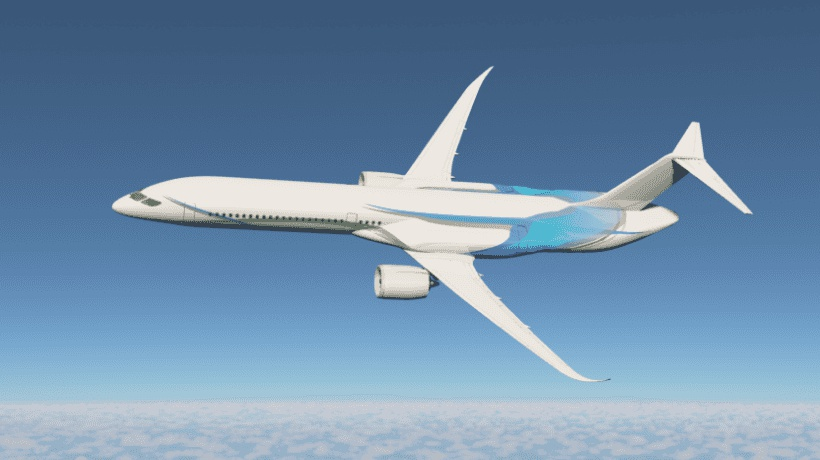

In [57]:
_, buf = cv2.imencode(".jpg", most_similar_image)
display(Image(data=buf.tobytes()))

最も類似した画像

画像をnotebookに表示するコードを関数化します

In [37]:
def display_notebook(image:np.ndarray):
    _, buf = cv2.imencode(".jpg", image)
    display(Image(data=buf.tobytes()))

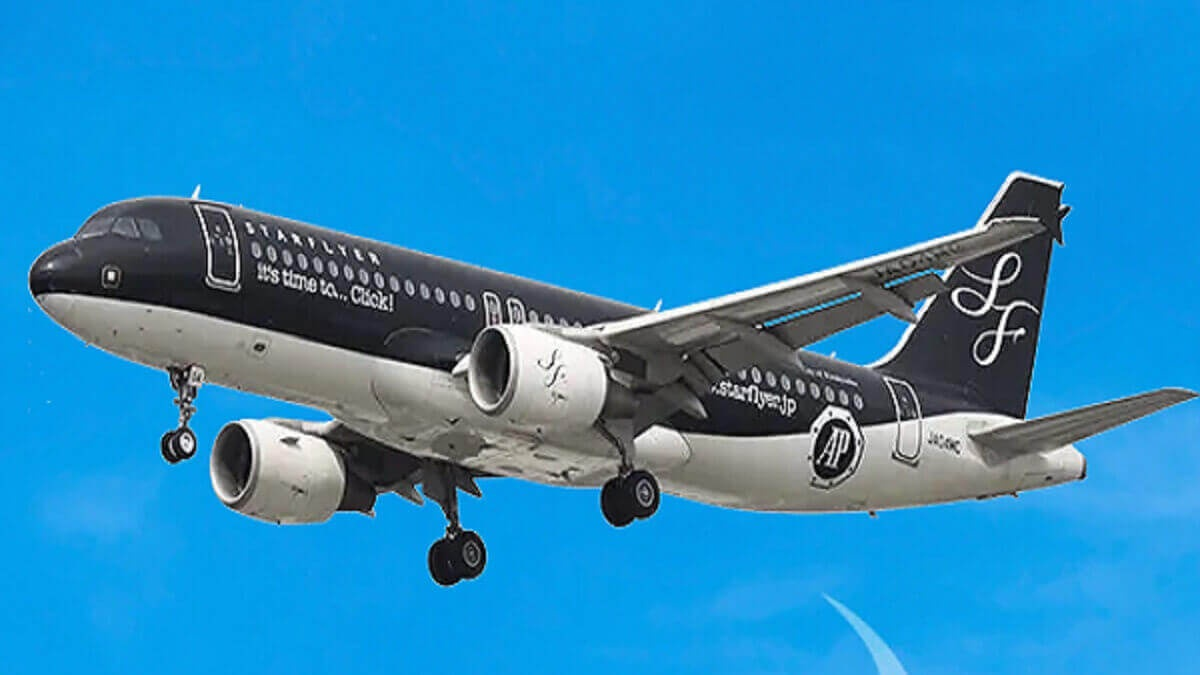

In [39]:
image = cv2.imread("../test/145.jpg")
display_notebook(image)

ターゲットの画像

確かに似ています

スコアの高い順に3つ表示

In [44]:
# dataイメージを再設定
image_iter = (cv2.imread(os.path.join("../data", f)) for f in os.listdir("../data"))

In [45]:
image_score = image_compare.list_similar_images(target_image, *image_iter)
image_score

[(array([[[121,  87,  58],
          [121,  87,  58],
          [121,  87,  58],
          ...,
          [121,  87,  58],
          [121,  87,  58],
          [121,  87,  58]],
  
         [[121,  87,  58],
          [121,  87,  58],
          [121,  87,  58],
          ...,
          [121,  87,  58],
          [121,  87,  58],
          [121,  87,  58]],
  
         [[121,  87,  58],
          [121,  87,  58],
          [121,  87,  58],
          ...,
          [121,  87,  58],
          [121,  87,  58],
          [121,  87,  58]],
  
         ...,
  
         [[201, 184, 166],
          [201, 184, 166],
          [201, 184, 166],
          ...,
          [201, 184, 166],
          [202, 189, 179],
          [202, 189, 179]],
  
         [[201, 184, 166],
          [201, 184, 166],
          [201, 184, 166],
          ...,
          [198, 177, 151],
          [201, 184, 166],
          [201, 184, 166]],
  
         [[201, 184, 166],
          [201, 184, 166],
          [201, 184, 166

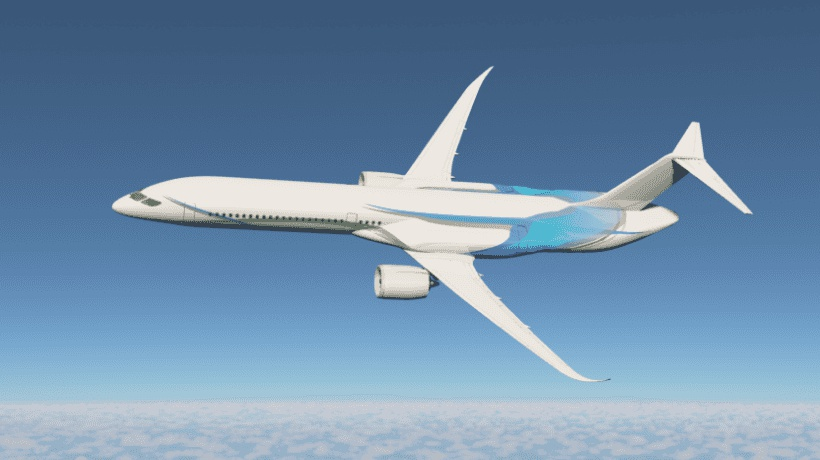

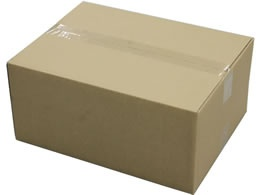

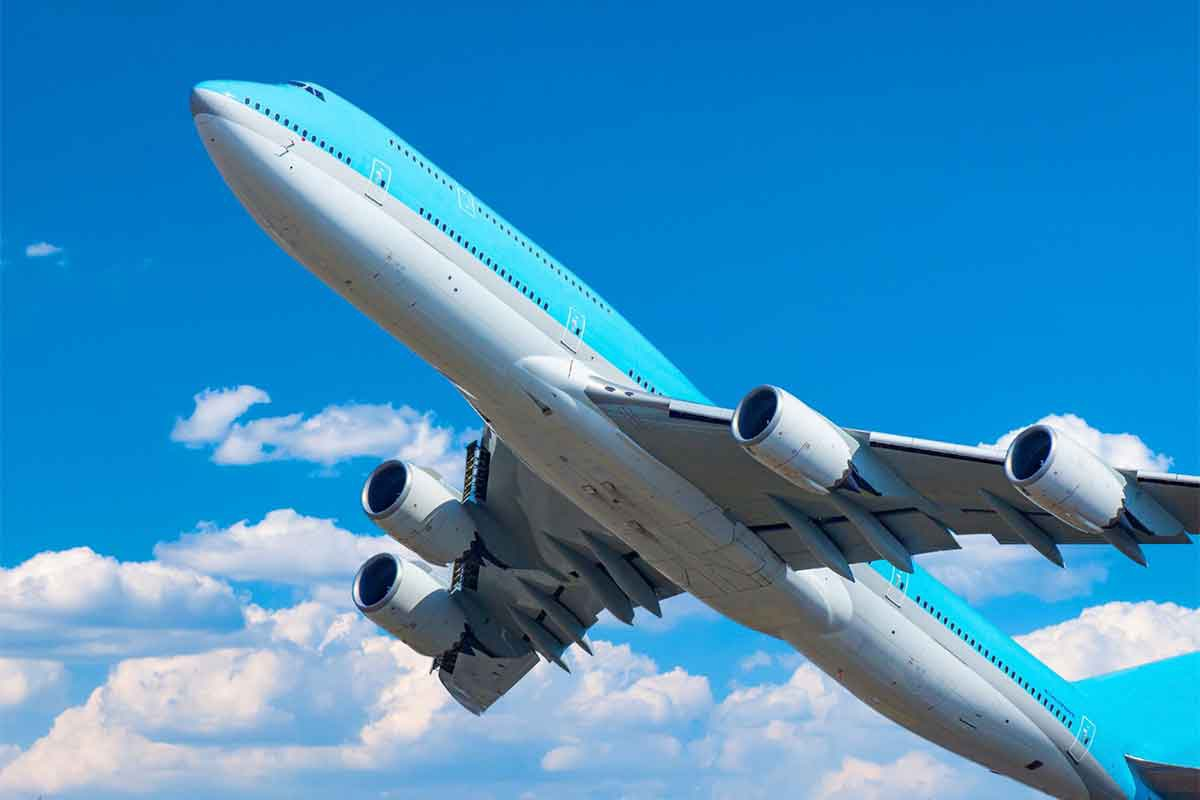

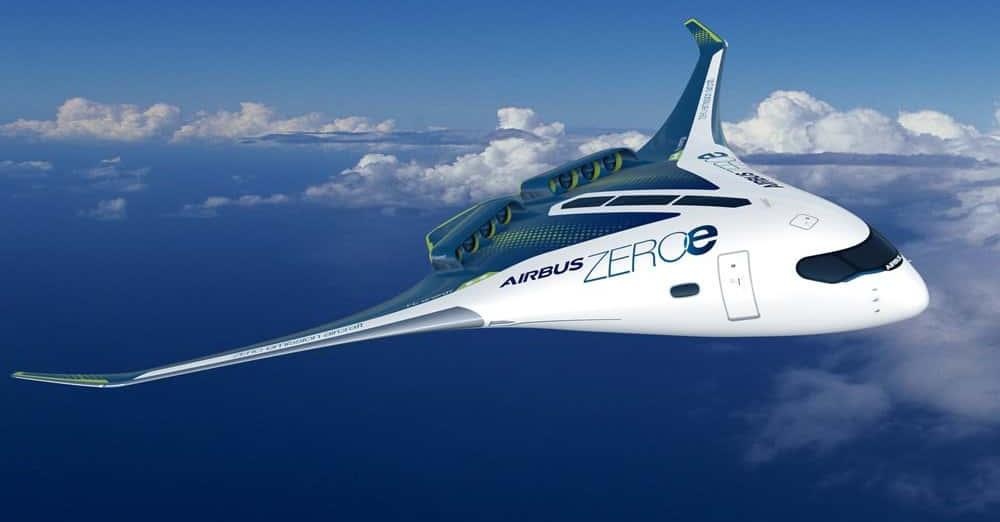

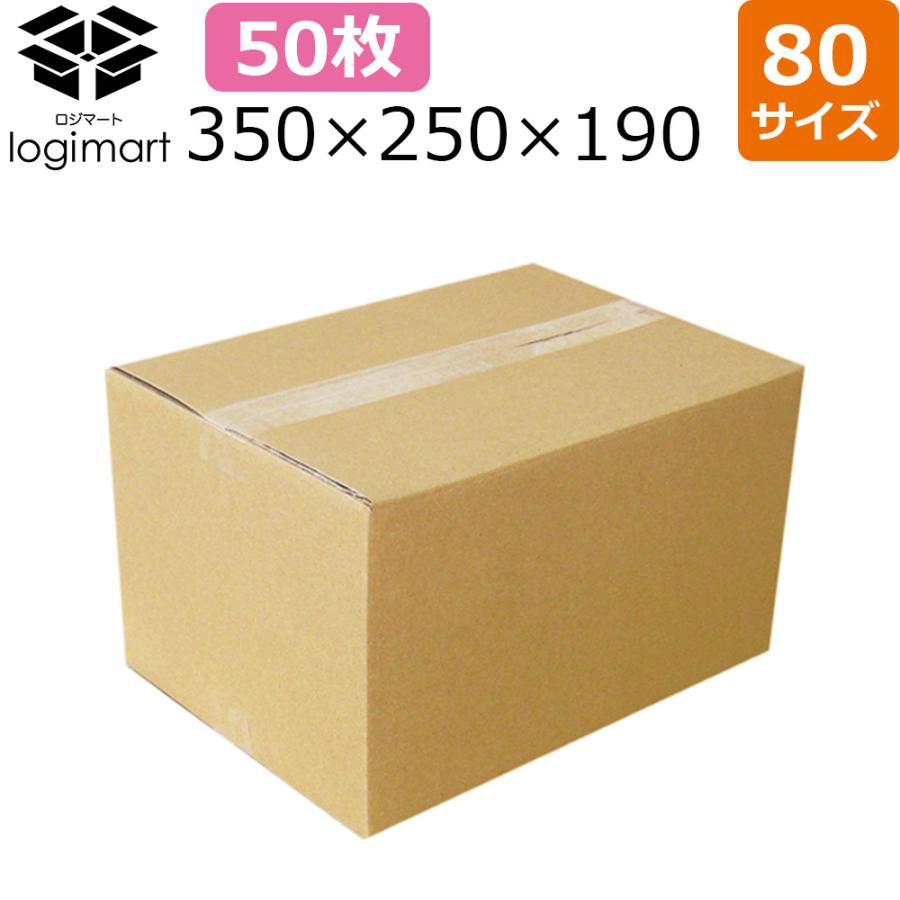

In [50]:
for image, _ in image_score[:5]:
    display_notebook(image)

ダンボール箱が誤認識すぎる！

## docxからimageを読み込み

In [51]:
from docx_master import extract_images_from_docx

`extract_images_from_docx()`を使ってdocx内のファイル名とimage bufferを取得します。

In [52]:
image_list = extract_images_from_docx("../sample.docx")
for name, buf in image_list:
    print(name, buf[:10])

word/media/image2.jpeg b'\xff\xd8\xff\xdb\x00\x84\x00\x05\x03\x04'
word/media/image3.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image5.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image6.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image7.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image8.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image4.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'
word/media/image1.jpeg b'\xff\xd8\xff\xe0\x00\x10JFIF'


bufferはIpython.displayのdisplay関数とImageクラスを使えばnotebookに表示できます。

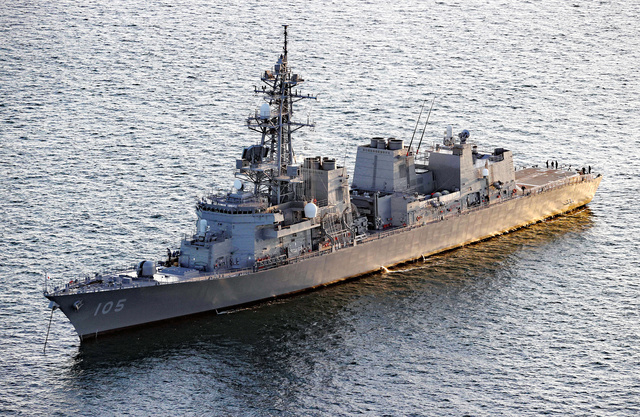

In [53]:
# 最後のbufを表示
display(Image(buf))

## 画像比較モジュールとdocx抜き出しモジュールを組み合わせる

試しにdocxの最後の画像(上で表示した画像)に最も似ている画像を抽出してみます。

In [58]:
image_list = extract_images_from_docx("../sample.docx")
tgt = image_list[-1]